In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import os

def to_np(tensor):
    return tensor.detach().cpu().numpy()

Skipping
Skipping
File already exists


/tmp/ipykernel_1826214/3085293970.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  res_dict = torch.load(save_path)


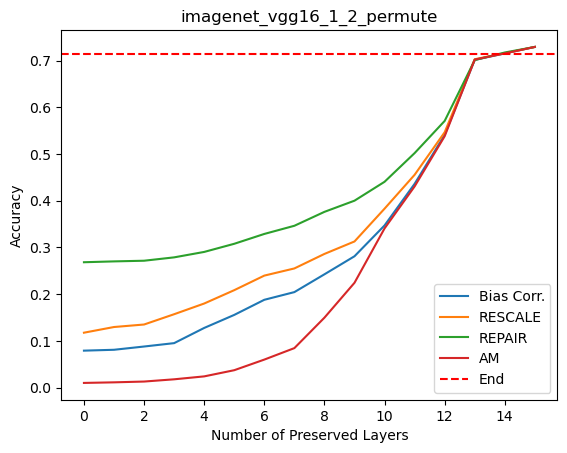

Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
File already exists


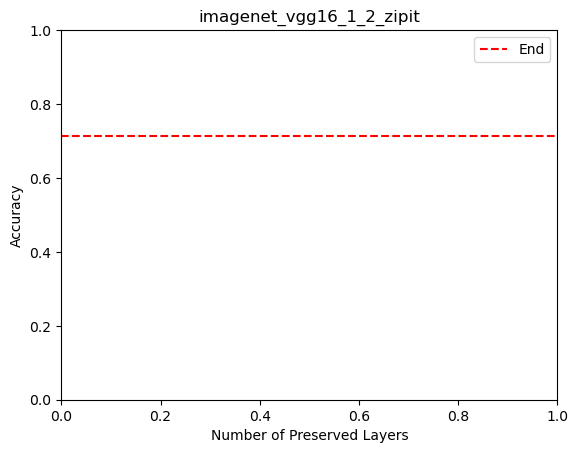

Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
File already exists


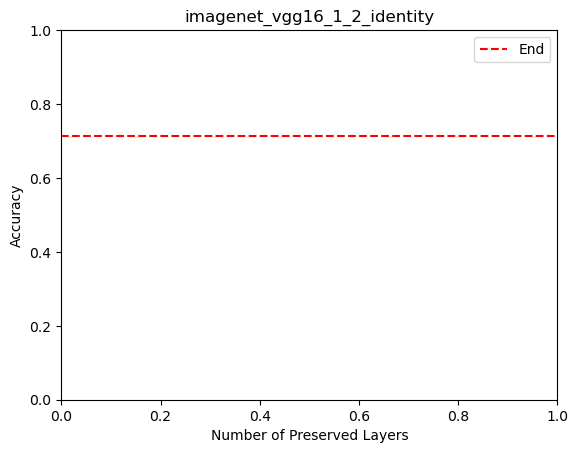

In [2]:
save_path = 'pfm_results/imagenet/imagenet_vgg16_1_2_results.pth'
save_dir = 'pfm_results/imagenet_plots/'
res_dict = torch.load(save_path)
data_model = save_path.split('/')[-1].split('.')[0]

key_label_map = {'bias_corr': 'Bias Corr.', 'rescale': 'RESCALE', 'repair': 'REPAIR', 'merger': 'AM', 'reset': 'RESET', 'zero_bias': 'Zero Bias'}
merging_fn_s = ['match_tensors_permute', 'match_tensors_zipit', 'match_tensors_identity']
for i, merging_fn in enumerate(merging_fn_s):
    if merging_fn not in res_dict:
        del merging_fn_s[i]

base_0 = res_dict['base_0']
base_1 = res_dict['base_1']
end_acc = (base_0['acc'] + base_1['acc']) / 2
ensemble_acc = res_dict['ensemble']['acc']

for merging_fn in merging_fn_s:

    merging_fn_res = res_dict[merging_fn]
    metric_key = 'acc'
    merging_fn_name = merging_fn.split('_')[-1]
    title = data_model.replace('results', merging_fn_name)
    for method_key in merging_fn_res.keys():
        method_res = merging_fn_res[method_key]
        metric = method_res[metric_key]
        if len(metric) == 0:
            print('Skipping')
            continue
        acc_array = to_np(metric)
        acc_array = np.append(acc_array, ensemble_acc)
        plt.plot(acc_array, label=key_label_map[method_key])
        
    plt.ylabel('Accuracy' if metric_key == 'acc' else 'Loss')
    plt.xlabel('Number of Preserved Layers')
    # plot the end accuracy
    plt.axhline(y=end_acc, color='r', linestyle='--', label='End')
    plt.legend()
    plt.title(title)

    ## save
    save_path = save_dir + title + '.pdf'
    if os.path.exists(save_dir) is False:
        os.makedirs(save_dir)
    if os.path.exists(save_path):
        print('File already exists')
    plt.savefig(save_path, format='pdf', bbox_inches='tight')
    plt.show()

CPAL imagenet resnet50 plot

In [13]:
stat_dict = torch.load('resnet50_pfm_details.pt')
param_ratio = stat_dict['param_ratio']
flops_ratio = stat_dict['flops_ratio']

/tmp/ipykernel_1826214/4095107484.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  stat_dict = torch.load('resnet50_pfm_details.pt')


In [63]:
flops_ratio_x_s = []
for th in [1.2, 1.6, 1.8]:
    last_index = np.where(flops_ratio[flops_ratio < th])[0][-1]
    flops_ratio_x_s.append(last_index+1)

flops_ratio_label_s = ['1.2x FLOPs', '1.6x FLOPs', '1.8x FLOPs']

In [64]:
param_ratio_x_s = []
for th in [1.2, 1.4, 1.8]:
    last_index = np.where(param_ratio[param_ratio < th])[0][-1]
    param_ratio_x_s.append(last_index+1)

param_ratio_label_s = ['1.2x Params', '1.4x Params', '1.8x Params']

/tmp/ipykernel_1826214/44164375.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  res_dict = torch.load(save_path)


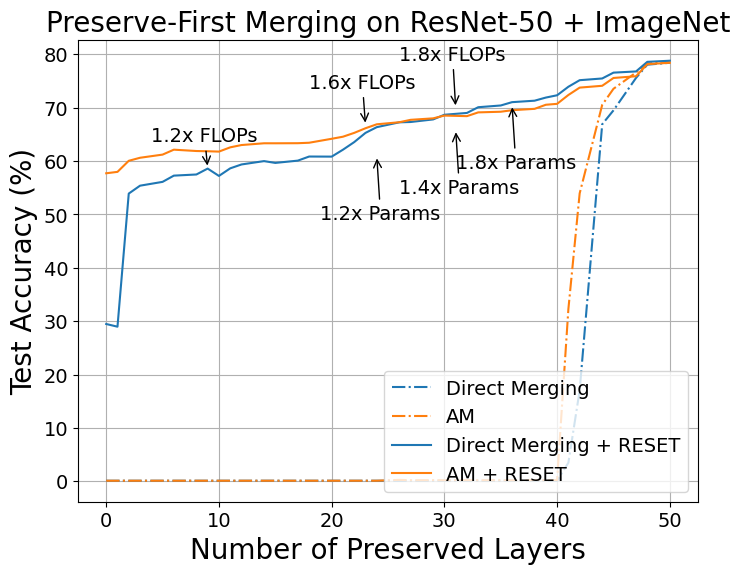

In [ ]:
save_path = 'pfm_results/imagenet/imagenet_resnet50_1_2_results.pth'
save_dir = 'pfm_results/imagenet_plots/'
res_dict = torch.load(save_path)

plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 14})

base_0 = res_dict['base_0']
base_1 = res_dict['base_1']
end_acc = (base_0['acc'] + base_1['acc']) / 2

plt.plot(stat_dict['preserverd_num'], res_dict['match_tensors_identity']['merger']['acc']*100, label='Direct Merging', color='tab:blue', linestyle='-.')
plt.plot(stat_dict['preserverd_num'], res_dict['match_tensors_permute']['merger']['acc']*100, label='AM', color='tab:orange', linestyle='-.')
plt.plot(stat_dict['preserverd_num'], res_dict['match_tensors_identity']['reset']['acc']*100, label='Direct Merging + RESET', color='tab:blue',)
plt.plot(stat_dict['preserverd_num'], res_dict['match_tensors_permute']['reset']['acc']*100, label='AM + RESET', color='tab:orange')

# write the flops_ratio and param_ratio; use a arrow to point to the direct merging + reset
for i, x in enumerate(flops_ratio_x_s):
    plt.annotate(flops_ratio_label_s[i], (x, res_dict['match_tensors_identity']['reset']['acc'][x]*100-(i*2)), xytext=(x-5, res_dict['match_tensors_identity']['reset']['acc'][x]*100+5), arrowprops=dict(facecolor='black', arrowstyle='->'))
    
for i, x in enumerate(param_ratio_x_s):
    plt.annotate(param_ratio_label_s[i], (x, res_dict['match_tensors_identity']['reset']['acc'][x]*100-8), xytext=(x-5, res_dict['match_tensors_identity']['reset']['acc'][x]*100-20), arrowprops=dict(facecolor='black', arrowstyle='->'))

# plot the end accuracy
# plt.axhline(y=end_acc*100, color='r', linestyle='--', label='End')
plt.xlabel('Number of Preserved Layers', fontsize=20)
plt.ylabel('Test Accuracy (%)', fontsize=20)
plt.title('Preserve-First Merging on ResNet-50 + ImageNet', fontsize=20)
plt.grid(True)
plt.legend(loc='lower right')
# plt.savefig('pfm_results/imagenet_resnet50.pdf', bbox_inches='tight')

In [ ]:
# merging_fn_s = ['match_tensors_permute', 'match_tensors_zipit',
#                 'match_tensors_identity']

# res_dict = {merging_fn: {'bias_corr': {'loss': [], 'acc': []}, 'zero_bias': {'loss': [], 'acc': []},
#                             'rescale': {'loss': [], 'acc': []}, 'repair': {'loss': [], 'acc': []},
#                             'merger': {'loss': [], 'acc': []}, 'reset': {'loss': [], 'acc': []}} for merging_fn in merging_fn_s}
# res_dict.update({'base_0': {'loss': 0.00456, 'acc': 0.71348}, 'base_1': {'loss': 0.004575, 'acc': 0.7132}})
# res_dict.update({'ensemble': {'loss': 0.004264, 'acc': 0.7295}})

# res_dict['match_tensors_permute'] = {
#         'bias_corr': {
#             'loss': [0.215809, 0.2157715, 0.2157355, 0.2156452, 0.215478, 0.215231,
#                      0.2148303, 0.21440858, 0.213404759, 0.211416163, 0.207836,
#                      0.199658991, 0.18075199, 0.077190, 0.04213369],
#             'acc': [0.07908, 0.08094, 0.08792, 0.09516, 0.1277, 0.15562, 0.18798,
#                     0.20444, 0.24256, 0.28122, 0.34722, 0.43636, 0.54118, 0.70184, 0.7156]
#         },
#         'rescale': {
#             'loss': [0.15434, 0.151125, 0.149414, 0.143786, 0.13795982, 0.1313143,
#                      0.1244710, 0.1224358, 0.1187336, 0.1140731, 0.111062, 0.103924,
#                      0.11503, 0.0691501, 0.0673257869],
#             'acc': [0.11752, 0.12968, 0.13504, 0.15708, 0.18, 0.2086, 0.23978,
#                     0.25512, 0.2862, 0.31288, 0.38312, 0.45564, 0.54684, 0.70312, 0.71604]
#         },
#         'repair': {
#             'loss': [0.16712140, 0.1666349, 0.1704915, 0.167649, 0.1627180, 0.1617065,
#                      0.1514842, 0.1459394, 0.1356612, 0.12840078, 0.1187614, 0.1132543,
#                      0.09544744, 0.053595, 0.0574764],
#             'acc': [0.2684, 0.27022, 0.27164, 0.27884, 0.29048, 0.30792, 0.329,
#                     0.34648, 0.3763, 0.40022, 0.44068, 0.50212, 0.57102, 0.70124, 0.71758]
#         },
#         'merger': {
#             'loss': [0.20789785, 0.207349, 0.206583, 0.205419, 0.204095, 0.202333,
#                      0.20071136, 0.19962653, 0.19728552, 0.1951159, 0.19165954,
#                      0.18477148, 0.17054002, 0.07173531, 0.04209811],
#             'acc': [0.00996, 0.0112, 0.0129, 0.0177, 0.02396, 0.0372, 0.05992,
#                     0.0845, 0.1497, 0.2244, 0.34086, 0.43078, 0.53832, 0.70246, 0.71564]
#         },
#         'zero_bias': {'loss': [], 'acc': []},  # 空
#         'reset': {'loss': [], 'acc': []}       # 空
#     }

# # convert list to tensor

# res_dict['match_tensors_permute']['bias_corr']['loss'] = torch.tensor(res_dict['match_tensors_permute']['bias_corr']['loss'])
# res_dict['match_tensors_permute']['bias_corr']['acc'] = torch.tensor(res_dict['match_tensors_permute']['bias_corr']['acc'])
# res_dict['match_tensors_permute']['rescale']['loss'] = torch.tensor(res_dict['match_tensors_permute']['rescale']['loss'])
# res_dict['match_tensors_permute']['rescale']['acc'] = torch.tensor(res_dict['match_tensors_permute']['rescale']['acc'])
# res_dict['match_tensors_permute']['repair']['loss'] = torch.tensor(res_dict['match_tensors_permute']['repair']['loss'])
# res_dict['match_tensors_permute']['repair']['acc'] = torch.tensor(res_dict['match_tensors_permute']['repair']['acc'])
# res_dict['match_tensors_permute']['merger']['loss'] = torch.tensor(res_dict['match_tensors_permute']['merger']['loss'])
# res_dict['match_tensors_permute']['merger']['acc'] = torch.tensor(res_dict['match_tensors_permute']['merger']['acc'])
    



In [132]:
# for merging_fn in merging_fn_s:

#     merging_fn_res = res_dict[merging_fn]
#     metric_key = 'acc'
#     merging_fn_name = merging_fn.split('_')[-1]
#     title = data_model.replace('results', merging_fn_name)
#     for method_key in merging_fn_res.keys():
#         method_res = merging_fn_res[method_key]
#         acc_array = to_np(method_res[metric_key])
#         if len(acc_array) == 0:
#             print('Skipping')
#             continue
#         acc_array = np.append(acc_array, ensemble_acc)
#         plt.plot(acc_array, label=key_label_map[method_key])
        
#     plt.ylabel('Accuracy' if metric_key == 'acc' else 'Loss')
#     plt.xlabel('Number of Preserved Layers')
#     # plot the end accuracy
#     plt.axhline(y=end_acc, color='r', linestyle='--', label='End')
#     plt.legend()
#     plt.title(title)

#     # ## save
#     # save_dir = 'pfm_results/plots/'
#     # save_path = save_dir + title + '.pdf'
#     # if os.path.exists(save_dir) is False:
#     #     os.makedirs(save_dir)
#     # if os.path.exists(save_path):
#     #     print('File already exists')
#     # plt.savefig(save_path, format='pdf', bbox_inches='tight')
#     plt.show()

## Calculate mean and std

In [78]:
import torch
from copy import deepcopy

pair_s = ['1_2', '2_3', '1_3']
save_path_template = 'pfm_results/cifar/cifar100_my_vgg16_{}_results.pth'
save_path_s = [save_path_template.format(pair) for pair in pair_s]
res_dict_s = [torch.load(save_path) for save_path in save_path_s]

/tmp/ipykernel_1771987/2593073892.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  res_dict_s = [torch.load(save_path) for save_path in save_path_s]


In [3]:
def calculate_multiple_dicts_mean_std(dicts):
    """
    递归计算多个字典之间对应数值或张量的 mean 和 std。
    
    Args:
        dicts (list): 包含多个相同结构字典的列表，叶子节点是 PyTorch 张量或标量。
    
    Returns:
        dict: 一个新的字典，包含所有叶子节点的 mean 和 std。
    """
    if not dicts:  # 如果输入为空，返回空字典
        return {}
    
    # 获取第一个字典的类型
    first_item = dicts[0]
    
    if isinstance(first_item, dict):  # 如果是字典，递归处理
        return {
            key: calculate_multiple_dicts_mean_std([d[key] for d in dicts])
            for key in first_item
        }
    elif isinstance(first_item, torch.Tensor):  # 如果是张量
        if first_item.numel() > 0:  # 如果张量非空
            # 拼接所有字典中对应的张量
            all_tensors = torch.stack([d for d in dicts if d.numel() > 0])
            return {
                'mean': torch.mean(all_tensors, dim=0).tolist(),
                'std': torch.std(all_tensors, dim=0).tolist()
            }
        else:
            return {'mean': None, 'std': None}  # 空张量返回 None
    elif isinstance(first_item, (float, int)):  # 如果是标量（数值类型）
        # 收集所有标量值
        all_values = torch.tensor([d for d in dicts], dtype=torch.float32)
        return {
            'mean': torch.mean(all_values).item(),
            'std': torch.std(all_values).item()
        }
    else:
        return None  # 非数值或张量类型，返回 None

In [79]:
# create a mean dict to store the mean values over all the pairs, a std dict to store the std values
summary_dict = calculate_multiple_dicts_mean_std(res_dict_s)

In [82]:
print('baseline:')
print('base_0:', summary_dict['base_0']['acc']['mean']*100)
print('base_0:', summary_dict['base_0']['acc']['std']*100)
print('base_1:', summary_dict['base_1']['acc']['mean']*100)
print('base_1:', summary_dict['base_1']['acc']['std']*100)
print('ensemble:', summary_dict['ensemble']['acc']['mean']*100)
print('ensemble:', summary_dict['ensemble']['acc']['std']*100)

matching_fn = 'match_tensors_identity'

print('Direct:')
print(np.array(summary_dict[matching_fn]['merger']['acc']['mean'])[[0, 3, 6, 8, 12]].round(4)*100)
print(np.array(summary_dict[matching_fn]['merger']['acc']['std'])[[0, 3, 6, 8, 12]].round(4)*100)

matching_fn = 'match_tensors_zipit'
print('W/o Norm:')
print(np.array(summary_dict[matching_fn]['merger']['acc']['mean'])[[0, 3, 6, 8, 12]].round(4)*100)
print(np.array(summary_dict[matching_fn]['merger']['acc']['std'])[[0, 3, 6, 8, 12]].round(4)*100)
print('Repair:')
print(np.array(summary_dict[matching_fn]['repair']['acc']['mean'])[[0, 3, 6, 8, 12]].round(4)*100)
print(np.array(summary_dict[matching_fn]['repair']['acc']['std'])[[0, 3, 6, 8, 12]].round(4)*100)
print('Rescale:')
print(np.array(summary_dict[matching_fn]['rescale']['acc']['mean'])[[0, 3, 6, 8, 12]].round(4)*100)
print(np.array(summary_dict[matching_fn]['rescale']['acc']['std'])[[0, 3, 6, 8, 12]].round(4)*100)
print('Bias Cal.:')
print(np.array(summary_dict[matching_fn]['bias_corr']['acc']['mean'])[[0, 3, 6, 8, 12]].round(4)*100)
print(np.array(summary_dict[matching_fn]['bias_corr']['acc']['std'])[[0, 3, 6, 8, 12]].round(4)*100)

baseline:
base_0: 63.3400022983551
base_0: 0.0692832050845027
base_1: 63.38667273521423
base_1: 0.10969755239784718
ensemble: 66.30333065986633
ensemble: 0.34239350352436304
Direct:
[ 1.02  1.03  1.42  1.67 56.79]
[0.03 0.05 0.18 0.25 0.4 ]
W/o Norm:
[ 1.43  3.23 12.69 29.48 63.51]
[0.09 0.16 0.24 0.55 0.21]
Repair:
[25.24 29.76 34.05 42.38 64.03]
[2.03 2.45 2.61 0.28 0.06]
Rescale:
[16.88 35.08 43.79 50.55 63.03]
[2.15 0.9  0.77 0.4  0.32]
Bias Cal.:
[31.91 40.07 45.72 51.   63.05]
[1.36 0.96 0.61 0.69 0.28]


In [76]:
# print('baseline:')
# print('base_0:', summary_dict['base_0']['acc']['mean']*100)
# print('base_0:', summary_dict['base_0']['acc']['std']*100)
# print('base_1:', summary_dict['base_1']['acc']['mean']*100)
# print('base_1:', summary_dict['base_1']['acc']['std']*100)
# print('ensemble:', summary_dict['ensemble']['acc']['mean']*100)
# print('ensemble:', summary_dict['ensemble']['acc']['std']*100)

# matching_fn = 'match_tensors_identity'
# print('Number of total layers:', len(summary_dict[matching_fn]['merger']['acc']['mean']))

# layer_idx_s = [0, 3, 6, 10, 12]

# print('Direct:')
# print(np.array(summary_dict[matching_fn]['merger']['acc']['mean'])[layer_idx_s].round(4)*100)
# print(np.array(summary_dict[matching_fn]['merger']['acc']['std'])[layer_idx_s].round(4)*100)

# matching_fn = 'match_tensors_permute'
# print('W/o Norm:')
# print(np.array(summary_dict[matching_fn]['merger']['acc']['mean'])[layer_idx_s].round(4)*100)
# print(np.array(summary_dict[matching_fn]['merger']['acc']['std'])[layer_idx_s].round(4)*100)
# print("reset:")
# print(np.array(summary_dict[matching_fn]['reset']['acc']['mean'])[layer_idx_s].round(4)*100)
# print(np.array(summary_dict[matching_fn]['reset']['acc']['std'])[layer_idx_s].round(4)*100)


# matching_fn = 'match_tensors_zipit'
# print('W/o Norm:')
# print(np.array(summary_dict[matching_fn]['merger']['acc']['mean'])[layer_idx_s].round(4)*100)
# print(np.array(summary_dict[matching_fn]['merger']['acc']['std'])[layer_idx_s].round(4)*100)
# print("reset:")
# print(np.array(summary_dict[matching_fn]['reset']['acc']['mean'])[layer_idx_s].round(4)*100)
# print(np.array(summary_dict[matching_fn]['reset']['acc']['std'])[layer_idx_s].round(4)*100)

In [34]:
np.array(summary_dict[matching_fn]['merger']['acc']['std'])[[0, 3, 6, 8, 12]].round(4)

array([0.    , 0.0005, 0.0038, 0.0654, 0.0019])

In [22]:
import numpy as np

np.round(np.array(summary_dict['match_tensors_identity']['merger']['acc']['mean'])[[0, 3, 6, 8, 12]] * 100, 2)

array([10.  , 10.03, 10.92, 26.35, 92.88])

In [23]:
np.round(np.array(summary_dict['match_tensors_identity']['merger']['acc']['std'])[[0, 3, 6, 8, 12]]*100, 2)

array([0.  , 0.05, 0.38, 6.54, 0.19])

In [9]:
summary_dict['ensemble']

{'loss': {'mean': 0.003002743935212493, 'std': 0.00010871699487324804},
 'acc': {'mean': 0.9293333888053894, 'std': 0.002926303306594491}}